In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator


In [7]:
data_ch_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_country_hall.csv")
data_lds_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_leeds.csv")
data_pr_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_park_royal.csv")
data_rvr_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_riverbank.csv")
data_vl_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_victoria_london.csv")
data_vic_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_victoria.csv")
data_vp_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_vondelpark.csv")
data_wm_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_westminster.csv")
data_wr_pp = pd.read_csv("../predicted-facilities2-crnn/predicted_wroclaw.csv")
data_dub_rb = pd.read_csv("../predicted-facilities2-crnn/predicted_dubai.csv")
data_edi_rb = pd.read_csv("../predicted-facilities2-crnn/predicted_edinburg.csv")
data_edw_rb = pd.read_csv("../predicted-facilities2-crnn/predicted_edwardian.csv")
data_el_rb = pd.read_csv("../predicted-facilities2-crnn/predicted_edwardian_london.csv")
data_gsw_rb = pd.read_csv("../predicted-facilities2-crnn/predicted_glasgow.csv")
data_liv_rb = pd.read_csv("../predicted-facilities2-crnn/predicted_liverpool.csv")
data_man_rb = pd.read_csv("../predicted-facilities2-crnn/predicted_manchester.csv")
data_syd_rb = pd.read_csv("../predicted-facilities2-crnn/predicted_sydney.csv")

In [19]:
list_poz_pp = [data_ch_pp[data_ch_pp['Predicted']>0], 
                   data_lds_pp[data_lds_pp['Predicted']>0], 
                   data_pr_pp[data_pr_pp['Predicted']>0], 
                   data_rvr_pp[data_rvr_pp['Predicted']>0], 
                   data_vl_pp[data_vl_pp['Predicted']>0], 
                   data_vic_pp[data_vic_pp['Predicted']>0], 
                   data_vp_pp[data_vp_pp['Predicted']>0], 
                   data_wm_pp[data_wm_pp['Predicted']>0], 
                   data_wr_pp[data_wr_pp['Predicted']>0]]

list_neg_pp = [data_ch_pp[data_ch_pp['Predicted']<1], 
                   data_lds_pp[data_lds_pp['Predicted']<1], 
                   data_pr_pp[data_pr_pp['Predicted']<1], 
                   data_rvr_pp[data_rvr_pp['Predicted']<1], 
                   data_vl_pp[data_vl_pp['Predicted']<1], 
                   data_vic_pp[data_vic_pp['Predicted']<1], 
                   data_vp_pp[data_vp_pp['Predicted']<1], 
                   data_wm_pp[data_wm_pp['Predicted']<1], 
                   data_wr_pp[data_wr_pp['Predicted']<1]]

list_poz_rb = [data_dub_rb[data_dub_rb['Predicted']>0], 
                   data_edi_rb[data_edi_rb['Predicted']>0], 
                   data_edw_rb[data_edw_rb['Predicted']>0], 
                   data_el_rb[data_el_rb['Predicted']>0], 
                   data_gsw_rb[data_gsw_rb['Predicted']>0], 
                   data_liv_rb[data_liv_rb['Predicted']>0], 
                   data_man_rb[data_man_rb['Predicted']>0], 
                   data_syd_rb[data_syd_rb['Predicted']>0]]

list_neg_rb = [data_dub_rb[data_dub_rb['Predicted']<1], 
                   data_edi_rb[data_edi_rb['Predicted']<1], 
                   data_edw_rb[data_edw_rb['Predicted']<1], 
                   data_el_rb[data_el_rb['Predicted']<1], 
                   data_gsw_rb[data_gsw_rb['Predicted']<1], 
                   data_liv_rb[data_liv_rb['Predicted']<1], 
                   data_man_rb[data_man_rb['Predicted']<1], 
                   data_syd_rb[data_syd_rb['Predicted']<1]]

In [17]:
dic_list_neg_rb[0].tail()

,Unnamed: 0,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,Facilities,Predicted
3808,3808,United Arab Emirates,Standard Room,1,September 2018,Solo traveler,Could not sleep from the noise of the parkin...,6.7,Good location..noisy room from the cars parkin...,0,parking,0
3809,3809,Philippines,Standard Room,1,August 2018,Family,We waited for an hour to check in. They said ...,6.7,Good,0,dirty,0
3810,3810,Philippines,Standard Room,1,August 2018,Family,We waited for an hour to check in. They said ...,6.7,Good,0,fitness,0
3816,3816,South Africa,Superior Room with Balcony,1,August 2018,Couple,Building finishings poor. Moulding and tiling...,5.8,Unworthy of 5 star rating,0,food/drink,0
3817,3817,South Africa,Superior Room with Balcony,1,August 2018,Couple,Building finishings poor. Moulding and tiling...,5.8,Unworthy of 5 star rating,0,noisiness,0


In [28]:
dic_poz_pp = {}
for hotel in list_poz_pp:
    for row in hotel['Facilities']:
        if row in dic_poz_pp.keys():
            dic_poz_pp[row] = dic_poz_pp[row] + 1
        else:
            dic_poz_pp[row] = 1
print(dic_poz_pp)

dic_poz_rb = {}
for hotel in list_poz_rb:
    for row in hotel['Facilities']:
        if row in dic_poz_rb.keys():
            dic_poz_rb[row] = dic_poz_rb[row] + 1
        else:
            dic_poz_rb[row] = 1
print(dic_poz_rb)

dic_neg_pp = {}
for hotel in list_neg_pp:
    for row in hotel['Facilities']:
        if row in dic_neg_pp.keys():
            dic_neg_pp[row] = dic_neg_pp[row] + 1
        else:
            dic_neg_pp[row] = 1
print(dic_neg_pp)

dic_neg_rb = {}
for hotel in list_neg_rb:
    for row in hotel['Facilities']:
        if row in dic_neg_rb.keys():
            dic_neg_rb[row] = dic_neg_rb[row] + 1
        else:
            dic_neg_rb[row] = 1
print(dic_poz_rb)

{'food/drink': 3159, 'internet': 216, 'comfort': 3169, 'bed': 2100, 'tv': 546, 'staff': 5623, 'dirty': 2675, 'location': 7874, 'price': 1242, 'covid': 225, 'bathroom': 1412, 'parking': 326, 'restaurant': 1358, 'temperature': 270, 'fitness': 507, 'noisiness': 698}
{'location': 6281, 'staff': 5178, 'dirty': 2060, 'food/drink': 3236, 'restaurant': 1234, 'comfort': 3111, 'price': 1004, 'bed': 2574, 'bathroom': 1012, 'covid': 139, 'parking': 282, 'noisiness': 808, 'fitness': 579, 'internet': 142, 'tv': 222, 'temperature': 211}
{'Facilities': 9, 'location': 4442, 'staff': 4255, 'food/drink': 4082, 'comfort': 1704, 'dirty': 2394, 'covid': 317, 'price': 2087, 'noisiness': 873, 'bed': 1961, 'tv': 676, 'restaurant': 1462, 'bathroom': 2100, 'parking': 512, 'fitness': 658, 'temperature': 457, 'internet': 274}
{'location': 6281, 'staff': 5178, 'dirty': 2060, 'food/drink': 3236, 'restaurant': 1234, 'comfort': 3111, 'price': 1004, 'bed': 2574, 'bathroom': 1012, 'covid': 139, 'parking': 282, 'noisines

In [82]:
df_poz = pd.DataFrame(columns=['Facilities', 'Number', 'Hotel'])
i = 0
for key in dic_poz_pp:
    df = pd.DataFrame({'Facilities': key, 
                       'Number': dic_poz_pp[key], 
                       'Hotel': 'Park Plaza'},
                     index=[i])
    df_poz = df_poz.append(df)
    i = i + 1

for key in dic_poz_rb:
    df = pd.DataFrame({'Facilities': key, 
                       'Number': dic_poz_rb[key], 
                       'Hotel': 'Radisson Blu'},
                     index=[i])
    df_poz = df_poz.append(df)
    i = i + 1

df_neg = pd.DataFrame(columns=['Facilities', 'Number', 'Hotel'])
i = 0
for key in dic_neg_pp:
    df = pd.DataFrame({'Facilities': key, 
                       'Number': dic_neg_pp[key], 
                       'Hotel': 'Park Plaza'},
                     index=[i])
    df_neg = df_neg.append(df)
    i = i + 1

for key in dic_neg_rb:
    df = pd.DataFrame({'Facilities': key, 
                       'Number': dic_neg_rb[key], 
                       'Hotel': 'Radisson Blu'},
                     index=[i])
    df_neg = df_neg.append(df)
    i = i + 1


In [94]:
data = df_neg.loc[df_neg['Facilities'] == 'location']
data

,Facilities,Number,Hotel
1,location,4442,Park Plaza
20,location,3064,Radisson Blu


In [95]:
# g = sns.FacetGrid(df_poz, col="Facilities", col_wrap=4)
# g.map(sns.countplot,'Hotel', data=df_poz)
# g.add_legend()
# sns.catplot(x='Facilities', hue='Hotel', kind='count', data=df_neg, aspect=1)

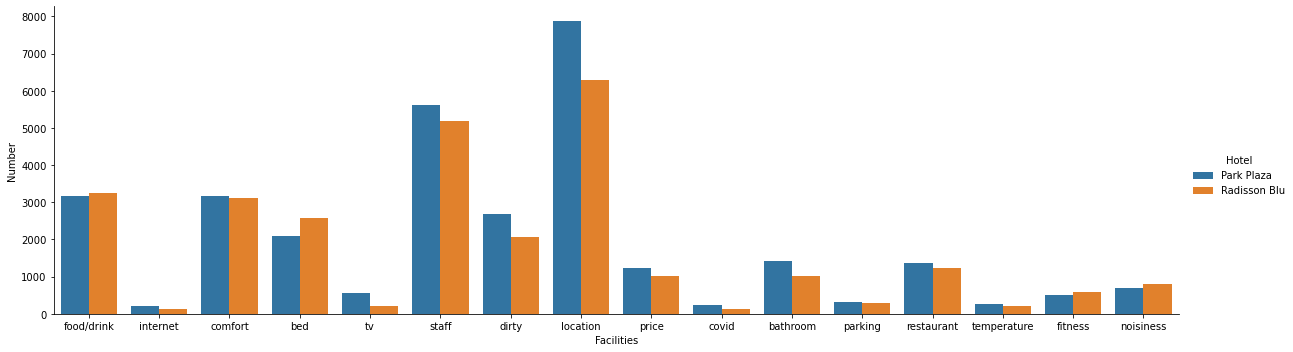

In [92]:
# sns.catplot(x='Facilities', hue='Hotel', kind='count', data=df_neg, aspect=1)
# “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”.
sns.catplot(x="Facilities", y="Number", hue="Hotel", kind="bar", data=df_poz, aspect=10/3)

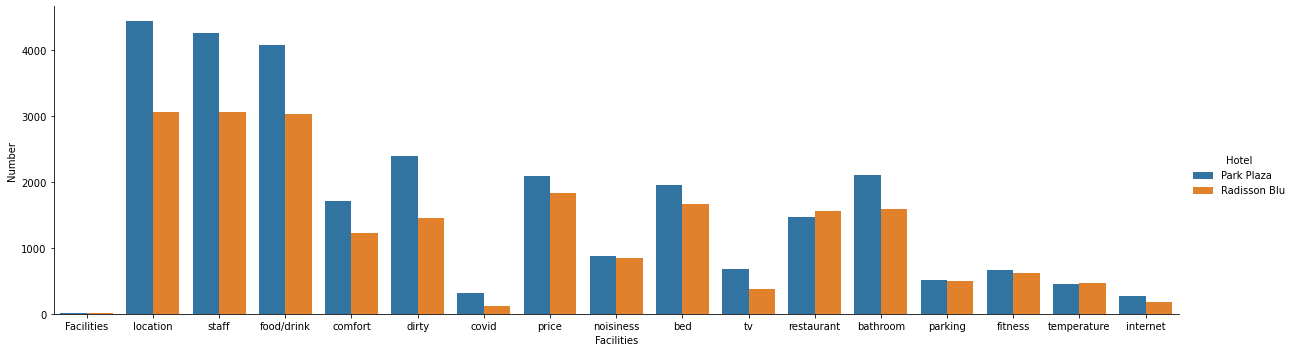

In [91]:
sns.catplot(x="Facilities", y="Number", hue="Hotel", kind="bar", data=df_neg, aspect=10/3)

In [110]:
# , ,
# , , , , 
# , , , , 
# 
dic_ch_poz_pp = {}
dic_ch_neg_pp = {}
for x, y in zip(data_ch_pp['Facilities'], data_ch_pp['Predicted']):  
    if y == 1:
        if x in dic_ch_poz_pp.keys():
            dic_ch_poz_pp[x] = dic_ch_poz_pp[x] + 1
        else:
            dic_ch_poz_pp[x] = 1 
    else:
        if x in dic_ch_neg_pp.keys():
            dic_ch_neg_pp[x] = dic_ch_neg_pp[x] + 1
        else:
            dic_ch_neg_pp[x] = 1 
print(dic_ch_poz_pp)
print(dic_ch_neg_pp)
#----------------------------------------------------------------
dic_lds_poz_pp = {}
dic_lds_neg_pp = {}
for x, y in zip(data_lds_pp['Facilities'], data_lds_pp['Predicted']):  
    if y == 1:
        if x in dic_lds_poz_pp.keys():
            dic_lds_poz_pp[x] = dic_lds_poz_pp[x] + 1
        else:
            dic_lds_poz_pp[x] = 1 
    else:
        if x in dic_lds_neg_pp.keys():
            dic_lds_neg_pp[x] = dic_lds_neg_pp[x] + 1
        else:
            dic_lds_neg_pp[x] = 1 
print(dic_lds_poz_pp)
print(dic_lds_neg_pp)
#----------------------------------------------------------------
dic_pr_poz_pp = {}
dic_pr_neg_pp = {}
for x, y in zip(data_pr_pp['Facilities'], data_pr_pp['Predicted']):  
    if y == 1:
        if x in dic_pr_poz_pp.keys():
            dic_pr_poz_pp[x] = dic_pr_poz_pp[x] + 1
        else:
            dic_pr_poz_pp[x] = 1 
    else:
        if x in dic_pr_neg_pp.keys():
            dic_pr_neg_pp[x] = dic_pr_neg_pp[x] + 1
        else:
            dic_pr_neg_pp[x] = 1 
print(dic_pr_poz_pp)
print(dic_pr_neg_pp)
#----------------------------------------------------------------
dic_rvr_poz_pp = {}
dic_rvr_neg_pp = {}
for x, y in zip(data_rvr_pp['Facilities'], data_rvr_pp['Predicted']):  
    if y == 1:
        if x in dic_rvr_poz_pp.keys():
            dic_rvr_poz_pp[x] = dic_rvr_poz_pp[x] + 1
        else:
            dic_rvr_poz_pp[x] = 1 
    else:
        if x in dic_rvr_neg_pp.keys():
            dic_rvr_neg_pp[x] = dic_rvr_neg_pp[x] + 1
        else:
            dic_rvr_neg_pp[x] = 1 
print(dic_rvr_poz_pp)
print(dic_rvr_neg_pp)
#----------------------------------------------------------------
dic_vl_poz_pp = {}
dic_vl_neg_pp = {}
for x, y in zip(data_vl_pp['Facilities'], data_vl_pp['Predicted']):  
    if y == 1:
        if x in dic_vl_poz_pp.keys():
            dic_vl_poz_pp[x] = dic_vl_poz_pp[x] + 1
        else:
            dic_vl_poz_pp[x] = 1 
    else:
        if x in dic_vl_neg_pp.keys():
            dic_vl_neg_pp[x] = dic_vl_neg_pp[x] + 1
        else:
            dic_vl_neg_pp[x] = 1 
print(dic_vl_poz_pp)
print(dic_vl_neg_pp)
#----------------------------------------------------------------
dic_vic_poz_pp = {}
dic_vic_neg_pp = {}
for x, y in zip(data_vic_pp['Facilities'], data_vic_pp['Predicted']):  
    if y == 1:
        if x in dic_vic_poz_pp.keys():
            dic_vic_poz_pp[x] = dic_vic_poz_pp[x] + 1
        else:
            dic_vic_poz_pp[x] = 1 
    else:
        if x in dic_vic_neg_pp.keys():
            dic_vic_neg_pp[x] = dic_vic_neg_pp[x] + 1
        else:
            dic_vic_neg_pp[x] = 1 
print(dic_vic_poz_pp)
print(dic_vic_neg_pp)
#----------------------------------------------------------------
dic_vp_poz_pp = {}
dic_vp_neg_pp = {}
for x, y in zip(data_vp_pp['Facilities'], data_vp_pp['Predicted']):  
    if y == 1:
        if x in dic_vp_poz_pp.keys():
            dic_vp_poz_pp[x] = dic_vp_poz_pp[x] + 1
        else:
            dic_vp_poz_pp[x] = 1 
    else:
        if x in dic_vp_neg_pp.keys():
            dic_vp_neg_pp[x] = dic_vp_neg_pp[x] + 1
        else:
            dic_vp_neg_pp[x] = 1 
print(dic_vp_poz_pp)
print(dic_vp_neg_pp)
#----------------------------------------------------------------
dic_wm_poz_pp = {}
dic_wm_neg_pp = {}
for x, y in zip(data_wm_pp['Facilities'], data_wm_pp['Predicted']):  
    if y == 1:
        if x in dic_wm_poz_pp.keys():
            dic_wm_poz_pp[x] = dic_wm_poz_pp[x] + 1
        else:
            dic_wm_poz_pp[x] = 1 
    else:
        if x in dic_wm_neg_pp.keys():
            dic_wm_neg_pp[x] = dic_wm_neg_pp[x] + 1
        else:
            dic_wm_neg_pp[x] = 1 
print(dic_wm_poz_pp)
print(dic_wm_neg_pp)
#----------------------------------------------------------------
dic_wr_poz_pp = {}
dic_wr_neg_pp = {}
for x, y in zip(data_wr_pp['Facilities'], data_wr_pp['Predicted']):  
    if y == 1:
        if x in dic_wr_poz_pp.keys():
            dic_wr_poz_pp[x] = dic_wr_poz_pp[x] + 1
        else:
            dic_wr_poz_pp[x] = 1 
    else:
        if x in dic_wr_neg_pp.keys():
            dic_wr_neg_pp[x] = dic_wr_neg_pp[x] + 1
        else:
            dic_wr_neg_pp[x] = 1 
print(dic_wr_poz_pp)
print(dic_wr_neg_pp)
#----------------------------------------------------------------
dic_dub_poz_rb = {}
dic_dub_neg_rb = {}
for x, y in zip(data_dub_rb['Facilities'], data_dub_rb['Predicted']):  
    if y == 1:
        if x in dic_dub_poz_rb.keys():
            dic_dub_poz_rb[x] = dic_dub_poz_rb[x] + 1
        else:
            dic_dub_poz_rb[x] = 1 
    else:
        if x in dic_dub_neg_rb.keys():
            dic_dub_neg_rb[x] = dic_dub_neg_rb[x] + 1
        else:
            dic_dub_neg_rb[x] = 1 
print(dic_dub_poz_rb)
print(dic_dub_neg_rb)
#----------------------------------------------------------------
dic_edi_poz_rb = {}
dic_edi_neg_rb = {}
for x, y in zip(data_edi_rb['Facilities'], data_edi_rb['Predicted']):  
    if y == 1:
        if x in dic_edi_poz_rb.keys():
            dic_edi_poz_rb[x] = dic_edi_poz_rb[x] + 1
        else:
            dic_edi_poz_rb[x] = 1 
    else:
        if x in dic_edi_neg_rb.keys():
            dic_edi_neg_rb[x] = dic_edi_neg_rb[x] + 1
        else:
            dic_edi_neg_rb[x] = 1 
print(dic_edi_poz_rb)
print(dic_edi_neg_rb)
#----------------------------------------------------------------
dic_edw_poz_rb = {}
dic_edw_neg_rb = {}
for x, y in zip(data_edw_rb['Facilities'], data_edw_rb['Predicted']):  
    if y == 1:
        if x in dic_edw_poz_rb.keys():
            dic_edw_poz_rb[x] = dic_edw_poz_rb[x] + 1
        else:
            dic_edw_poz_rb[x] = 1 
    else:
        if x in dic_edw_neg_rb.keys():
            dic_edw_neg_rb[x] = dic_edw_neg_rb[x] + 1
        else:
            dic_edw_neg_rb[x] = 1 
print(dic_edw_poz_rb)
print(dic_edw_neg_rb)
#----------------------------------------------------------------
dic_el_poz_rb = {}
dic_el_neg_rb = {}
for x, y in zip(data_el_rb['Facilities'], data_el_rb['Predicted']):  
    if y == 1:
        if x in dic_el_poz_rb.keys():
            dic_el_poz_rb[x] = dic_el_poz_rb[x] + 1
        else:
            dic_el_poz_rb[x] = 1 
    else:
        if x in dic_el_neg_rb.keys():
            dic_el_neg_rb[x] = dic_el_neg_rb[x] + 1
        else:
            dic_el_neg_rb[x] = 1 
print(dic_el_poz_rb)
print(dic_el_neg_rb)
#----------------------------------------------------------------
dic_gsw_poz_rb = {}
dic_gsw_neg_rb = {}
for x, y in zip(data_gsw_rb['Facilities'], data_gsw_rb['Predicted']):  
    if y == 1:
        if x in dic_gsw_poz_rb.keys():
            dic_gsw_poz_rb[x] = dic_gsw_poz_rb[x] + 1
        else:
            dic_gsw_poz_rb[x] = 1 
    else:
        if x in dic_gsw_neg_rb.keys():
            dic_gsw_neg_rb[x] = dic_gsw_neg_rb[x] + 1
        else:
            dic_gsw_neg_rb[x] = 1 
print(dic_gsw_poz_rb)
print(dic_gsw_neg_rb)
#----------------------------------------------------------------
dic_liv_poz_rb = {}
dic_liv_neg_rb = {}
for x, y in zip(data_liv_rb['Facilities'], data_liv_rb['Predicted']):  
    if y == 1:
        if x in dic_liv_poz_rb.keys():
            dic_liv_poz_rb[x] = dic_liv_poz_rb[x] + 1
        else:
            dic_liv_poz_rb[x] = 1 
    else:
        if x in dic_liv_neg_rb.keys():
            dic_liv_neg_rb[x] = dic_liv_neg_rb[x] + 1
        else:
            dic_liv_neg_rb[x] = 1 
print(dic_liv_poz_rb)
print(dic_liv_neg_rb)
#----------------------------------------------------------------
dic_man_poz_rb = {}
dic_man_neg_rb = {}
for x, y in zip(data_man_rb['Facilities'], data_man_rb['Predicted']):  
    if y == 1:
        if x in dic_man_poz_rb.keys():
            dic_man_poz_rb[x] = dic_man_poz_rb[x] + 1
        else:
            dic_man_poz_rb[x] = 1 
    else:
        if x in dic_man_neg_rb.keys():
            dic_man_neg_rb[x] = dic_man_neg_rb[x] + 1
        else:
            dic_man_neg_rb[x] = 1 
print(dic_man_poz_rb)
print(dic_man_neg_rb)
#----------------------------------------------------------------
dic_syd_poz_rb = {}
dic_syd_neg_rb = {}
for x, y in zip(data_syd_rb['Facilities'], data_syd_rb['Predicted']):  
    if y == 1:
        if x in dic_syd_poz_rb.keys():
            dic_syd_poz_rb[x] = dic_syd_poz_rb[x] + 1
        else:
            dic_syd_poz_rb[x] = 1 
    else:
        if x in dic_syd_neg_rb.keys():
            dic_syd_neg_rb[x] = dic_syd_neg_rb[x] + 1
        else:
            dic_syd_neg_rb[x] = 1 
print(dic_syd_poz_rb)
print(dic_syd_neg_rb)

{'food/drink': 308, 'internet': 22, 'comfort': 227, 'bed': 175, 'tv': 42, 'staff': 520, 'dirty': 214, 'location': 746, 'price': 124, 'covid': 32, 'bathroom': 119, 'parking': 16, 'restaurant': 118, 'temperature': 30, 'fitness': 20, 'noisiness': 57}
{'Facilities': 1, 'location': 543, 'staff': 493, 'food/drink': 430, 'comfort': 132, 'dirty': 178, 'covid': 23, 'price': 184, 'noisiness': 91, 'bed': 142, 'tv': 63, 'restaurant': 192, 'bathroom': 173, 'parking': 24, 'fitness': 22, 'temperature': 62, 'internet': 33}
{'staff': 639, 'food/drink': 385, 'location': 1064, 'price': 159, 'bathroom': 187, 'comfort': 339, 'bed': 306, 'noisiness': 111, 'dirty': 308, 'parking': 75, 'covid': 35, 'restaurant': 167, 'internet': 31, 'tv': 79, 'temperature': 28, 'fitness': 11}
{'Facilities': 1, 'bed': 402, 'tv': 119, 'internet': 41, 'location': 678, 'food/drink': 451, 'staff': 463, 'price': 254, 'covid': 49, 'fitness': 19, 'dirty': 358, 'restaurant': 175, 'comfort': 233, 'bathroom': 312, 'temperature': 78, 'pa

In [124]:
dic_list_poz_pp = [dic_ch_poz_pp, dic_lds_poz_pp, dic_pr_poz_pp, dic_rvr_poz_pp,
                   dic_vl_poz_pp, dic_vic_poz_pp, dic_vp_poz_pp, dic_wm_poz_pp, 
                   dic_wr_poz_pp]

dic_list_poz_rb = [dic_dub_poz_rb, dic_edi_poz_rb, dic_edw_poz_rb, dic_el_poz_rb, 
                   dic_gsw_poz_rb, dic_liv_poz_rb, dic_man_poz_rb, dic_syd_poz_rb]

dic_list_neg_pp = [dic_ch_neg_pp, dic_lds_neg_pp, dic_pr_neg_pp, dic_rvr_neg_pp, 
                   dic_vl_neg_pp, dic_vic_neg_pp, dic_vp_neg_pp, dic_wm_neg_pp, 
                   dic_wr_neg_pp]

dic_list_neg_rb = [dic_dub_neg_rb, dic_edi_neg_rb, dic_edw_neg_rb, dic_el_neg_rb, 
                   dic_gsw_neg_rb, dic_liv_neg_rb, dic_man_neg_rb, dic_syd_neg_rb]

fac_poz_top3_pp = {}
for dic in dic_list_poz_pp:
    sort_dic = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    i = 0
    for k in sort_dic.keys():    
        if i == 3:
            break
        if k in fac_poz_top3_pp.keys():
            fac_poz_top3_pp[k] = fac_poz_top3_pp[k] + 1
        else:
            fac_poz_top3_pp[k] = 1
        i = i + 1
print(fac_poz_top3_pp)

fac_neg_top3_pp = {}
for dic in dic_list_neg_pp:
    sort_dic = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    i = 0
    for k in sort_dic.keys():        
        if i == 3:
            break
        if k in fac_neg_top3_pp.keys():
            fac_neg_top3_pp[k] = fac_neg_top3_pp[k] + 1
        else:
            fac_neg_top3_pp[k] = 1
        i = i + 1
print(fac_neg_top3_pp)

fac_poz_top3_rb = {}
for dic in dic_list_poz_rb:
    sort_dic = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    i = 0
    for k in sort_dic.keys():        
        if i == 3:
            break
        if k in fac_poz_top3_rb.keys():
            fac_poz_top3_rb[k] = fac_poz_top3_rb[k] + 1
        else:
            fac_poz_top3_rb[k] = 1
        i = i + 1
print(fac_poz_top3_rb)

fac_neg_top3_rb = {}
for dic in dic_list_neg_rb:
    sort_dic = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    i = 0
    for k in sort_dic.keys():        
        if i == 3:
            break
        if k in fac_neg_top3_rb.keys():
            fac_neg_top3_rb[k] = fac_neg_top3_rb[k] + 1
        else:
            fac_neg_top3_rb[k] = 1
        i = i + 1
print(fac_neg_top3_rb)


{'location': 9, 'staff': 9, 'food/drink': 5, 'comfort': 4}
{'location': 9, 'staff': 9, 'food/drink': 9}
{'staff': 8, 'location': 8, 'food/drink': 4, 'comfort': 3, 'bed': 1}
{'staff': 7, 'food/drink': 8, 'location': 8, 'price': 1}


In [128]:
df_poz_top3 = pd.DataFrame(columns=['Facilities', 'Number', 'Hotel'])
i = 0
for key in fac_poz_top3_pp:
    df = pd.DataFrame({'Facilities': key, 
                       'Number': fac_poz_top3_pp[key], 
                       'Hotel': 'Park Plaza'},
                     index=[i])
    df_poz_top3 = df_poz_top3.append(df)
    i = i + 1

for key in fac_poz_top3_rb:
    df = pd.DataFrame({'Facilities': key, 
                       'Number': fac_poz_top3_rb[key], 
                       'Hotel': 'Radisson Blu'},
                     index=[i])
    df_poz_top3 = df_poz_top3.append(df)
    i = i + 1

df_neg_top3 = pd.DataFrame(columns=['Facilities', 'Number', 'Hotel'])
i = 0
for key in fac_neg_top3_pp:
    df = pd.DataFrame({'Facilities': key, 
                       'Number': fac_neg_top3_pp[key], 
                       'Hotel': 'Park Plaza'},
                     index=[i])
    df_neg_top3 = df_neg_top3.append(df)
    i = i + 1

for key in fac_neg_top3_rb:
    df = pd.DataFrame({'Facilities': key, 
                       'Number': fac_neg_top3_rb[key], 
                       'Hotel': 'Radisson Blu'},
                     index=[i])
    df_neg_top3 = df_neg_top3.append(df)
    i = i + 1
df_poz_top3

,Facilities,Number,Hotel
0,location,9,Park Plaza
1,staff,9,Park Plaza
2,food/drink,5,Park Plaza
3,comfort,4,Park Plaza
4,staff,8,Radisson Blu
5,location,8,Radisson Blu
6,food/drink,4,Radisson Blu
7,comfort,3,Radisson Blu
8,bed,1,Radisson Blu


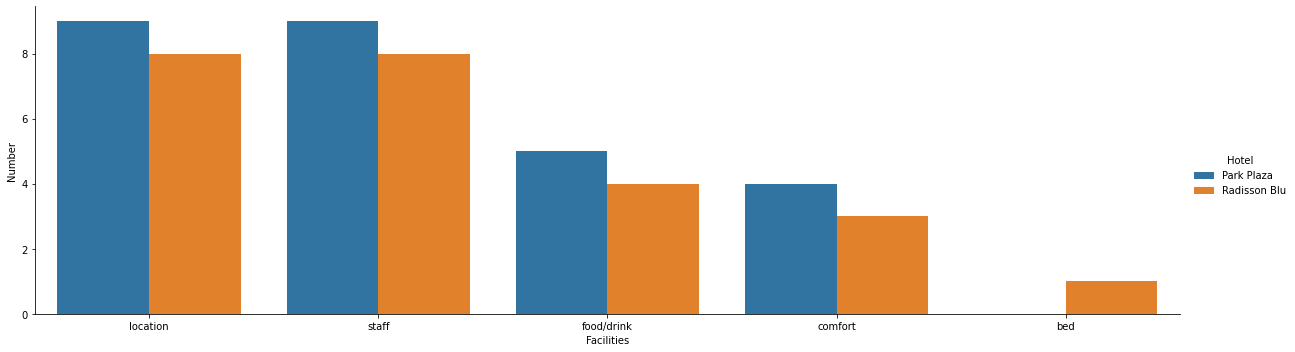

In [129]:
sns.catplot(x="Facilities", y="Number", hue="Hotel", kind="bar", data=df_poz_top3, aspect=10/3)

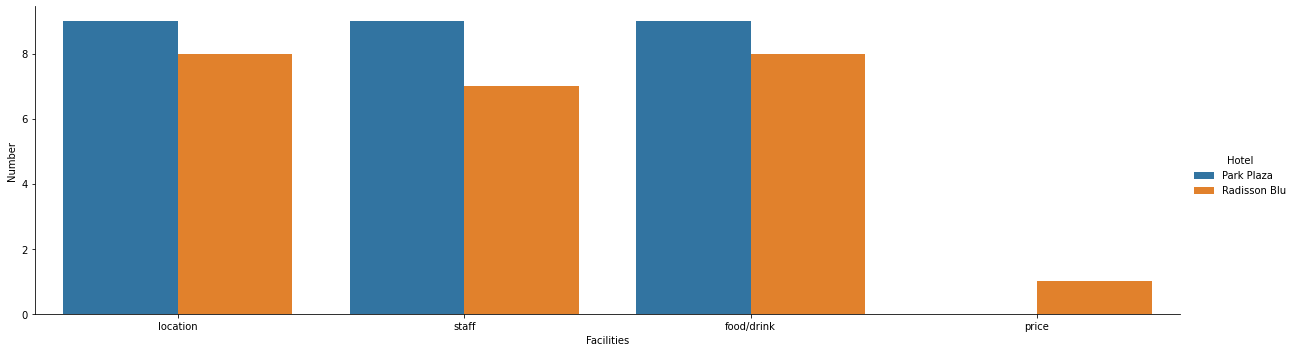

In [130]:
sns.catplot(x="Facilities", y="Number", hue="Hotel", kind="bar", data=df_neg_top3, aspect=10/3)